In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pickle
## Stats on Output and Citation

# Load and clean the output file
aujour_or = pd.read_csv("2010AJR.csv")

aujour_or = aujour_or.drop(aujour_or.columns[[0]], axis=1)
aujour_or = aujour_or.drop(aujour_or.columns[[range(2,8)]], axis=1)

# Normalise the ISSN numbersimport pandas as pd
aujour_or = aujour_or.rename(columns = {"Title":"VolumeTitle"})
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('X', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('X', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('X', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('X', '')
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('-', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('-', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('-', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('-', '')
aujour_or

,Rank,VolumeTitle,ISSN1,ISSN2,ISSN3,ISSN4
0,C,1913: a journal of forms,15489914,NaN,NaN,NaN
1,B,3CMedia,18326161,1445971,NaN,NaN
2,C,4OR: A Quarterly Journal of Operations Research,16194500,03908127,NaN,NaN
3,C,A St A: Advances in Statistical Analysis,18638171,1863818,00026018,NaN
4,A,AA files: annals of the Architectural Associat...,02616823,NaN,NaN,NaN
5,B,AACE International Transactions,15287106,NaN,NaN,NaN
6,B,AACE Journal,15513696,NaN,NaN,NaN
7,C,AACN Advanced Critical Care,15597768,15597776,10790713,NaN
8,C,AANA Journal,00946354,NaN,NaN,NaN
9,C,AAOHN Journal,08910162,NaN,NaN,NaN


In [2]:
# Load the journal names from the UOA and their ISSNs
refcs_or = pd.read_csv("REF2014Data_output.csv")

# Clean the data
refcs_or = refcs_or.drop(refcs_or.columns[[range(1,8)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[[range(2,7)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[3::], axis=1)
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('X', '')
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('-', '')

refcs_or

,UKPRN,VolumeTitle,ISSN
0,10007760,Economic Inquiry,00952583
1,10007760,The B.E. Journal of Macroeconomics (Topics),19351690
2,10007760,The North American Journal of Economics and Fi...,10629408
3,10007760,Journal of Computational and Applied Mathematics,03770427
4,10007760,Journal of Economic Dynamics and Control,01651889
5,10007760,Calcolo,00080624
6,10007760,Foundations of Computational Mathematics,16153375
7,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042
8,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042
9,10007760,Econometric Theory,02664666


In [3]:
# create a dictionary of indexed ISSNs
ref = {}
for index, row in refcs_or.iterrows():
    indexs = index
    ref[index] = row["ISSN"]
ref.get(7647)

In [4]:
# Retrieve all the ISSNs from the Australian journals into one ISSN column
ajourone = {}
for index, row in aujour_or.iterrows():
    ajourone[row["ISSN1"]] = row["Rank"]


In [5]:
ajourtwo = {}
for index, row in aujour_or.iterrows():
    ajourtwo[row["ISSN2"]] = row["Rank"]

len(ajourtwo)

11416

In [7]:
ajourthree = {}
for index, row in aujour_or.iterrows():
    ajourthree[row["ISSN3"]] = row["Rank"]


In [8]:
ajourfour = {}
for index, row in aujour_or.iterrows():
    ajourfour[row["ISSN4"]] = row["Rank"]


In [9]:
# Merge Australian journal ranks with UOA data by ISSN
ranklistone = {}

for index in ref:
    for issn in ajourone:
        if issn == ref[index]:
            ranklistone[index] = ajourone[issn]

In [10]:
ranklisttwo = {}

for index in ref:
    for issn in ajourtwo:
        if issn == ref[index]:
            ranklisttwo[index] = ajourtwo[issn]

In [11]:
ranklistthree = {}

for index in ref:
    for issn in ajourthree:
        if issn == ref[index]:
            ranklistthree[index] = ajourthree[issn]

In [12]:
ranklistfour= {}

for index in ref:
    for issn in ajourfour:
        if issn == ref[index]:
            ranklistfour[index] = ajourfour[issn]

In [13]:
ref_rankd = refcs_or
ref_rankd["Rank1"] = pd.Series(ranklistone)
ref_rankd["Rank2"] = pd.Series(ranklisttwo)
ref_rankd["Rank3"] = pd.Series(ranklistthree)
ref_rankd["Rank4"] = pd.Series(ranklistfour)


ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank2']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank3']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank4']

ref_rankd = ref_rankd.drop(["Rank2", "Rank3", "Rank4"], axis = 1)

count_nan = len(ref_rankd) - ref_rankd.count()

refranking = ref_rankd

ref_rankd



,UKPRN,VolumeTitle,ISSN,Rank1
0,10007760,Economic Inquiry,00952583,A
1,10007760,The B.E. Journal of Macroeconomics (Topics),19351690,A
2,10007760,The North American Journal of Economics and Fi...,10629408,B
3,10007760,Journal of Computational and Applied Mathematics,03770427,A
4,10007760,Journal of Economic Dynamics and Control,01651889,A*
5,10007760,Calcolo,00080624,B
6,10007760,Foundations of Computational Mathematics,16153375,A
7,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042,NaN
8,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042,NaN
9,10007760,Econometric Theory,02664666,A*


In [14]:
# Assign a score to the ranks
ref_rankd = ref_rankd.replace("A*", 4)
ref_rankd = ref_rankd.replace("A", 3)
ref_rankd = ref_rankd.replace("B", 2)
ref_rankd = ref_rankd.replace("C", 1)
ref_rankd = ref_rankd.replace("Not ranked",0)
ref_rankd

,UKPRN,VolumeTitle,ISSN,Rank1
0,10007760,Economic Inquiry,00952583,3.0
1,10007760,The B.E. Journal of Macroeconomics (Topics),19351690,3.0
2,10007760,The North American Journal of Economics and Fi...,10629408,2.0
3,10007760,Journal of Computational and Applied Mathematics,03770427,3.0
4,10007760,Journal of Economic Dynamics and Control,01651889,4.0
5,10007760,Calcolo,00080624,2.0
6,10007760,Foundations of Computational Mathematics,16153375,3.0
7,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042,NaN
8,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042,NaN
9,10007760,Econometric Theory,02664666,4.0


In [15]:
## Find the average ranks to fill the nans with the mean ranks for each uni
sum_rank = {}
len_rank = {}

rref = ref_rankd.dropna()

#for index, rows in av_rankd.iterrows():

for index, rows in rref.iterrows():
    if rows["UKPRN"] not in len_rank:
        len_rank[rows["UKPRN"]] = 1
    else:
        len_rank[rows["UKPRN"]] += 1
        
for index, rows in rref.iterrows():    
    if rows["UKPRN"] not in sum_rank:
        sum_rank[rows["UKPRN"]] = rows["Rank1"]
    else:
        sum_rank[rows["UKPRN"]] += rows["Rank1"]
        
av_rank = {}

for univd in len_rank:
    for univid in sum_rank:
        if univd == univid:
            av_rank[univd] = sum_rank[univd] / len_rank[univid]


In [16]:


indexlist = list()
rankinglist = list()

for index, row in ref_rankd.iterrows():
    for uniid in av_rank:
        if uniid == row["UKPRN"]:
            indexlist.append(uniid)
            rankinglist.append(av_rank[uniid])


In [17]:
ref_rankd["Rank1"] = pd.Series(rankinglist)

In [18]:
## This is the normalised ref_rankd
#ref_rankd = ref_rankd.drop(["Rank1"], axis = 1)

ref_rankd

,UKPRN,VolumeTitle,ISSN,Rank1
0,10007760,Economic Inquiry,00952583,3.070588
1,10007760,The B.E. Journal of Macroeconomics (Topics),19351690,3.070588
2,10007760,The North American Journal of Economics and Fi...,10629408,3.070588
3,10007760,Journal of Computational and Applied Mathematics,03770427,3.070588
4,10007760,Journal of Economic Dynamics and Control,01651889,3.070588
5,10007760,Calcolo,00080624,3.070588
6,10007760,Foundations of Computational Mathematics,16153375,3.070588
7,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042,3.070588
8,10007760,"Economics: The Open-Access, Open-Assessment E-...",18646042,3.070588
9,10007760,Econometric Theory,02664666,3.070588


In [19]:
## Now to create a dictionary with the average ranking per uni
unijourank = dict(zip(indexlist,rankinglist))

#with open("univ_journrank_physics.pkl", 'wb') as handle:
 #   pickle.dump(unijourank, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
## Now to add the four star rating
fourstr = pd.read_csv("REF2014Data_submissionprofile.csv")



fourstr = fourstr[fourstr["Profile"].str.contains("Outputs")]
fourstr = fourstr.drop(fourstr.columns[[1,2,3,5,6,7,8]], axis=1)

fourstrdic = {}

for index, row in fourstr.iterrows():
    fourstrdic[row["UKPRN"]] = row["FourStar"]
    
#with open("univ_fourstr_physics.pkl", 'wb') as handle:
 #   pickle.dump(fourstrdic, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
rankfour = {}

for uni in fourstrdic:
    for unis in unijourank:
        if unis == uni:
            rankfour[unijourank[unis]] = fourstrdic[uni]

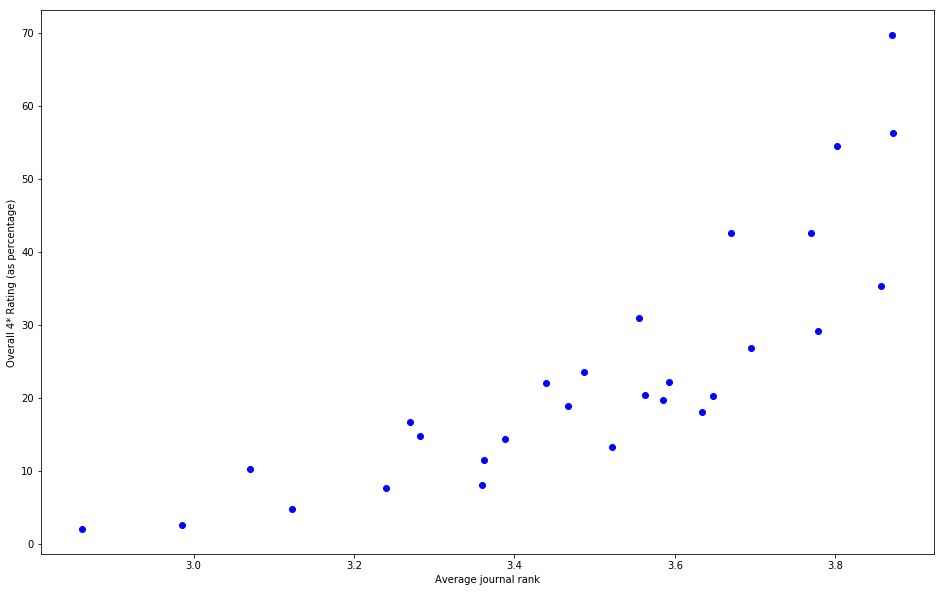

In [22]:
import matplotlib.pylab as plt
%matplotlib inline

lists = sorted(rankfour.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize = [16,10])
plt.plot(x, y, "bo")
plt.xlabel("Average journal rank")
plt.ylabel("Overall 4* Rating (as percentage)")

#plt.savefig("jpeg")


In [23]:
from scipy.stats.stats import pearsonr

pearsonr(x,y)

(0.82650048076367078, 5.9983437589054437e-08)

In [24]:
########### FUTHER ANALYSIS TO CLARIFY RESULTS ###############

totastar = {}
tota = {}
totb = {}
totc = {}

for index,row in refranking.iterrows():
    if row["Rank1"] == "A*":
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 1
        else:
            totastar[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 0
            
    if row["Rank1"] == "A":
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 1
        else:
            tota[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 0
            
    if row["Rank1"] == "B":
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 1
        else:
            totb[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 0
            
    if row["Rank1"] == "C":
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 1
        else:
            totc[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 0

In [25]:
dataframe  = pd.DataFrame.from_dict(totastar, orient = "index")

In [26]:
dataframe = dataframe.rename(columns = {0:"A*"})

In [27]:
totalist = tuple(tota.items())
totblist = tuple(totb.items())
totclist = tuple(totc.items())
totuni = tuple(unijourank.items())
unifour = tuple(fourstrdic.items())

x, totalisty = zip(*totalist)
x, totblisty = zip(*totblist)
x, totclisty = zip(*totclist)
x, totuniy = zip(*totuni)
x, unifoury = zip(*unifour)

In [28]:
dataframe["A"] = pd.Series(totalisty).values
dataframe["B"] = pd.Series(totblisty).values
dataframe["C"] = pd.Series(totclisty).values
dataframe["Av. Rank"] = pd.Series(totuniy).values
dataframe["Four Str"] = pd.Series(unifoury).values



In [29]:

dataframe = dataframe.rename(columns = {0:"A*"})
dataframe.to_csv("General Stats.csv")

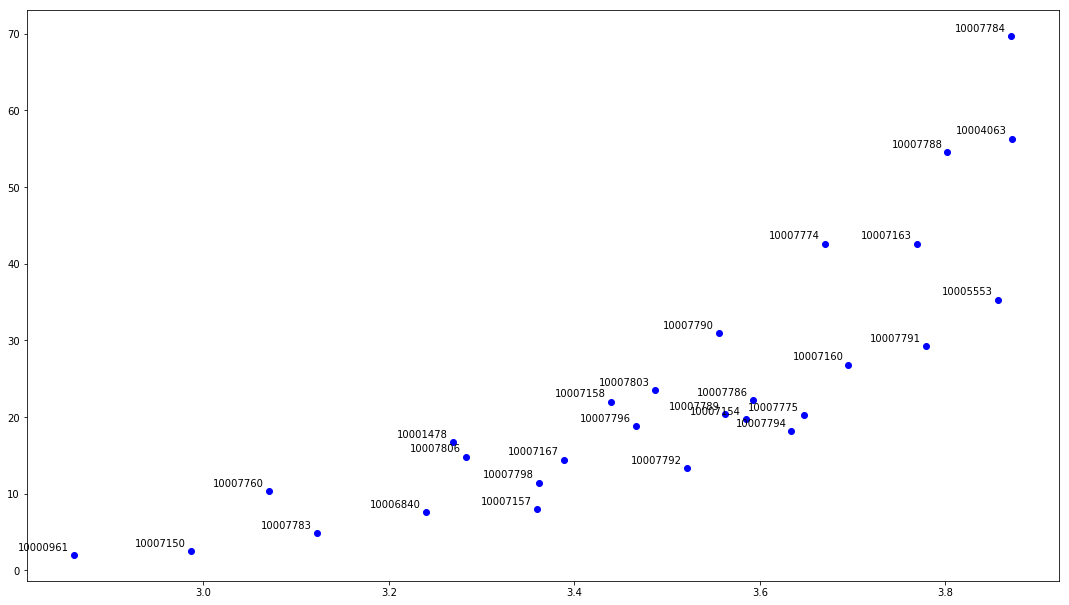

In [30]:

x = dataframe["Av. Rank"] 
y = dataframe["Four Str"]
z = dataframe.index

fig, ax = plt.subplots()
ax.plot(x, y, 'bo')
fig.set_size_inches(18.5, 10.5)

for X, Y, Z in zip(x, y, z):
    # Annotate the points 5 _points_ above and to the left of the vertex
    ax.annotate('{}'.format(Z), xy=(X,Y), xytext=(-5, 5), ha='right',
                textcoords='offset points')

plt.show()

In [31]:
dataframe = dataframe.sort_values("Av. Rank")

dataframe
#dataframe.to_csv("General Stats.csv")

,A*,A,B,C,Av. Rank,Four Str
10000961,19,51,14,9,2.860215,2.0
10007150,13,46,12,1,2.986111,2.5
10007760,29,37,15,4,3.070588,10.3
10007783,13,39,4,1,3.122807,4.8
10006840,31,33,9,2,3.240000,7.6
10001478,25,18,7,2,3.269231,16.7
10007806,16,27,3,0,3.282609,14.8
10007157,18,32,0,0,3.360000,8.0
10007798,51,45,5,4,3.361905,11.4
10007167,54,40,4,5,3.388350,14.4


In [32]:
tot_astar = dataframe["A*"].sum()
tot_a = dataframe["A"].sum()
tot_b = dataframe["B"].sum()
tot_c = dataframe["C"].sum()

In [33]:
print(tot_astar, tot_a, tot_b, tot_c)

1393 750 104 45
